https://rasterio.readthedocs.io/en/latest/#

https://rasterio.readthedocs.io/en/stable/quickstart.html
    
Images from http://earthi.space/sample-data-download/ Milton Keynes dataset which has been processed to Level1 (radiometrically and sensor corrected).

* Imaging Satellite: DMC3 - FM1
* Imaging Mode: Strip Mode
* Orbit Direction: Ascending
* Off pointing angle: -10.002011°
* Acquisition date: 10th May 2016
* File Format: GeoTIFF
* Center Lon: -0.752130617
* Center Lat: 52.042331982

In [1]:
import os
import xmltodict
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
rasterio.__version__

'1.0.8'

In [3]:
image_file = '/Users/robincole/Documents/Github/rasterio/tests/data/RGB.byte.tif'

In [5]:
print(image_file)

# use rasterio to read in the satellite image
dataset = rasterio.open(image_file)

/Users/robincole/Documents/Github/rasterio/tests/data/RGB.byte.tif


In [6]:
dataset.name

'/Users/robincole/Documents/Github/rasterio/tests/data/RGB.byte.tif'

In [7]:
dataset.count # the number of bands

3

In [8]:
dataset.width

791

In [9]:
{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}

{1: 'uint8', 2: 'uint8', 3: 'uint8'}

In [10]:
dataset.bounds

BoundingBox(left=101985.0, bottom=2611485.0, right=339315.0, top=2826915.0)

In [11]:
dataset.indexes

(1, 2, 3)

In [12]:
dataset.mode # READ OR WRITE

'r'

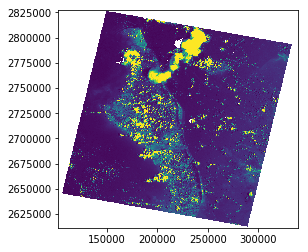

In [13]:
show(dataset, cmap='viridis');

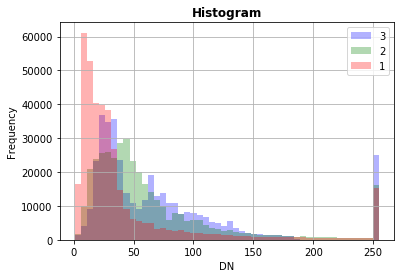

In [14]:
show_hist(dataset, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")